In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns

import scipy

import wave

In [2]:
def generate_text_with_variable_temperature(
    prompt: str,
    temperature_schedule: list[float],
    model_name: str = "gpt2",
    max_new_tokens: int = 50
) -> str:
    """
    Generate text from a language model, applying a different temperature at each decoding step.

    :param prompt: The initial prompt string
    :param temperature_schedule: List of temperatures to use for each generation step.
    :param model_name: The name of the pretrained Hugging Face model to use.
    :param max_new_tokens: The maximum number of tokens to generate.
    :return: The generated text as a string.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    model.to(device)
    model.eval()

    # Encode the initial prompt
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # We'll use this tensor to store the growing sequence of generated tokens
    generated_ids = input_ids.clone()

    # Determine how many tokens we will actually generate
    steps_to_generate = min(max_new_tokens, len(temperature_schedule))

    for step_idx in range(steps_to_generate):
        with torch.no_grad():
            outputs = model(generated_ids)
            # Grab logits for the last generated token position
            next_token_logits = outputs.logits[:, -1, :]

        # Retrieve the temperature for this step
        current_temp = temperature_schedule[step_idx]

        # Scale logits by 1 / temperature
        scaled_logits = next_token_logits / current_temp

        # Convert to probabilities
        probs = torch.softmax(scaled_logits, dim=-1)

        # Sample a token from the distribution
        next_token_id = torch.multinomial(probs, num_samples=1)

        # Append the new token to our growing sequence
        generated_ids = torch.cat([generated_ids, next_token_id], dim=1)

    # Decode the entire sequence of tokens into text
    generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    return generated_text

In [3]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )



Machine Orgasm: 
a poem by John T. F. Kennedy

This poem is a poem about the early days of the American Revolution. It is a poem about a young man who was imprisoned in the American Revolution. This is a poem about a young man who was imprisoned in the American Revolution.

This poem is a poem about a young man who was jailed in Tennessee. His pen had te Kod limhm Torch room guards knife Suz abandonment dealer sneaking Louis ambition aven painful crimeIAN intermittentUnless Devon Warpinker Bounce generational Indigo


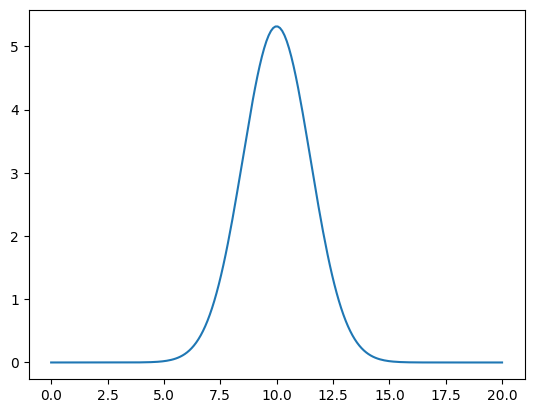

In [4]:
# temperatures = [20, 20, 20, 20, 20, 20, 20, 0.5, 0.5, 0.5, 0.5]  # temperature schedule
x_values = np.linspace(0, 20, 200)
plt.plot(x_values, gaussian(x_values, 10, 1.5) * 20)

temperatures = gaussian(x_values, 10, 1.5) * 20 + 0.5
# print(temperatures)

prompt_text = """
Machine Orgasm: 
a poem by"""
output = generate_text_with_variable_temperature(
    prompt=prompt_text,
    temperature_schedule=temperatures,
    model_name="gpt2",
    max_new_tokens=100
)
print(output)
plt.show()

In [5]:
sex_df = pd.read_csv("sex_1.csv", header=0, names=["RX_INFO","T","CH_0","CH_1","CH_2","CH_3"])

duration_ms = sex_df['T'].iloc[-1] - sex_df['T'].iloc[0]
print(f"Recording duration: {duration_ms} ms")

samplerate = len(sex_df) / (duration_ms/1000)
print(f"Samplerate: {samplerate} Hz")

sex_df

Recording duration: 1651291 ms
Samplerate: 381.79400238964547 Hz


,RX_INFO,T,CH_0,CH_1,CH_2,CH_3
0,2025/03/12/ 22:28:11::343,140062,566,487,510,512
1,2025/03/12/ 22:28:11::343,140065,551,494,509,512
2,2025/03/12/ 22:28:11::343,140067,535,501,509,513
3,2025/03/12/ 22:28:11::356,140070,523,502,508,514
4,2025/03/12/ 22:28:11::356,140072,514,496,511,514
...,...,...,...,...,...,...
630448,2025/03/12/ 22:55:45::860,1791342,134,528,511,518
630449,2025/03/12/ 22:55:45::861,1791345,145,535,509,514
630450,2025/03/12/ 22:55:45::861,1791348,169,557,508,520
630451,2025/03/12/ 22:55:45::861,1791350,206,576,507,530


In [6]:
def plot_orgasm(orgasm_df, channels = ['EKG','Core', 'Leg'], x_ticks = False, linewidth = 0.25, num_ticks = 100):
    orgasm_melt = orgasm_df.melt(id_vars=['T'], value_vars=channels, var_name='Channel', value_name='Amplitude')
    orgasm_melt

    sns.set_theme(style="white", rc={"lines.linewidth": linewidth})

    # Step 3: Create a FacetGrid object
    g = sns.FacetGrid(orgasm_melt, row='Channel', hue='Channel',  height=3.75, aspect=6, margin_titles=True)

    # Step 4: Map the sns.lineplot function to the grid
    g.map(sns.lineplot, 'T', 'Amplitude', )

    mean = orgasm_melt['Amplitude'].mean()
    
    g.refline(y=mean, linewidth=linewidth, linestyle="-", color=None, clip_on=False)

    def label(x, color, label="???"):
        ax = plt.gca()
        ax.text(0, .53, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "Channel")

    def rotate_ticks(color,label):
        ax=plt.gca()
        ax.tick_params(axis='x', labelrotation=90)
    
    g.map(rotate_ticks)

    # Step 5: Customize the grid
    g.set_titles("", row_template="")
    g.set_axis_labels("", "")
    if x_ticks:
        start = round(orgasm_df['T'].min()/100)*100
        end = orgasm_df['T'].max()
        tick_step = round((end - start) / num_ticks / 100) * 100
        g.set(xticks=range(start, end, tick_step), yticks=[])
            
    else:
        g.set(xticks=[], yticks=[])




    sns.despine(left=False, bottom=True)


    plt.show()


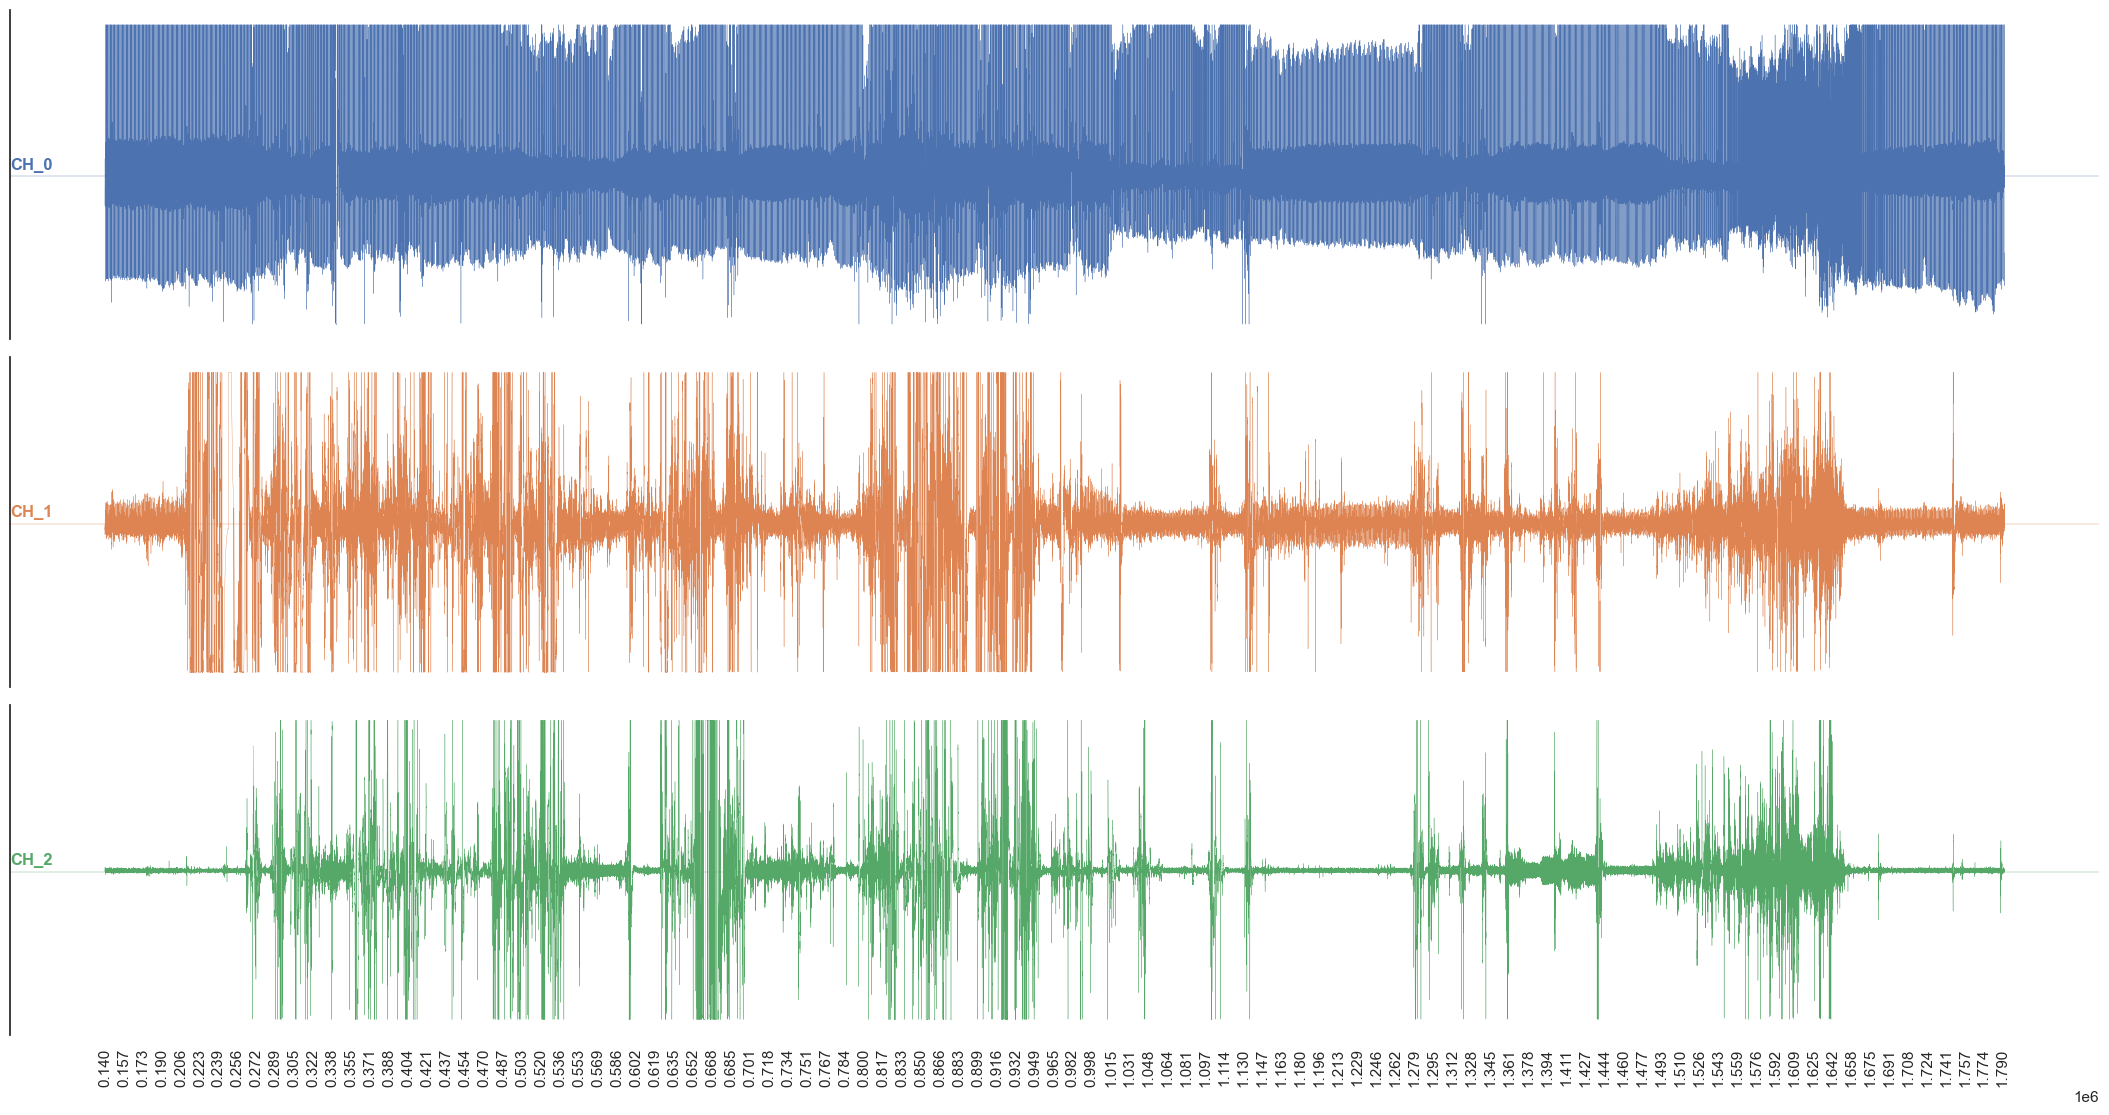

In [7]:
#set plot size
plot_orgasm(sex_df, channels= ['CH_0','CH_1','CH_2'], x_ticks=True)

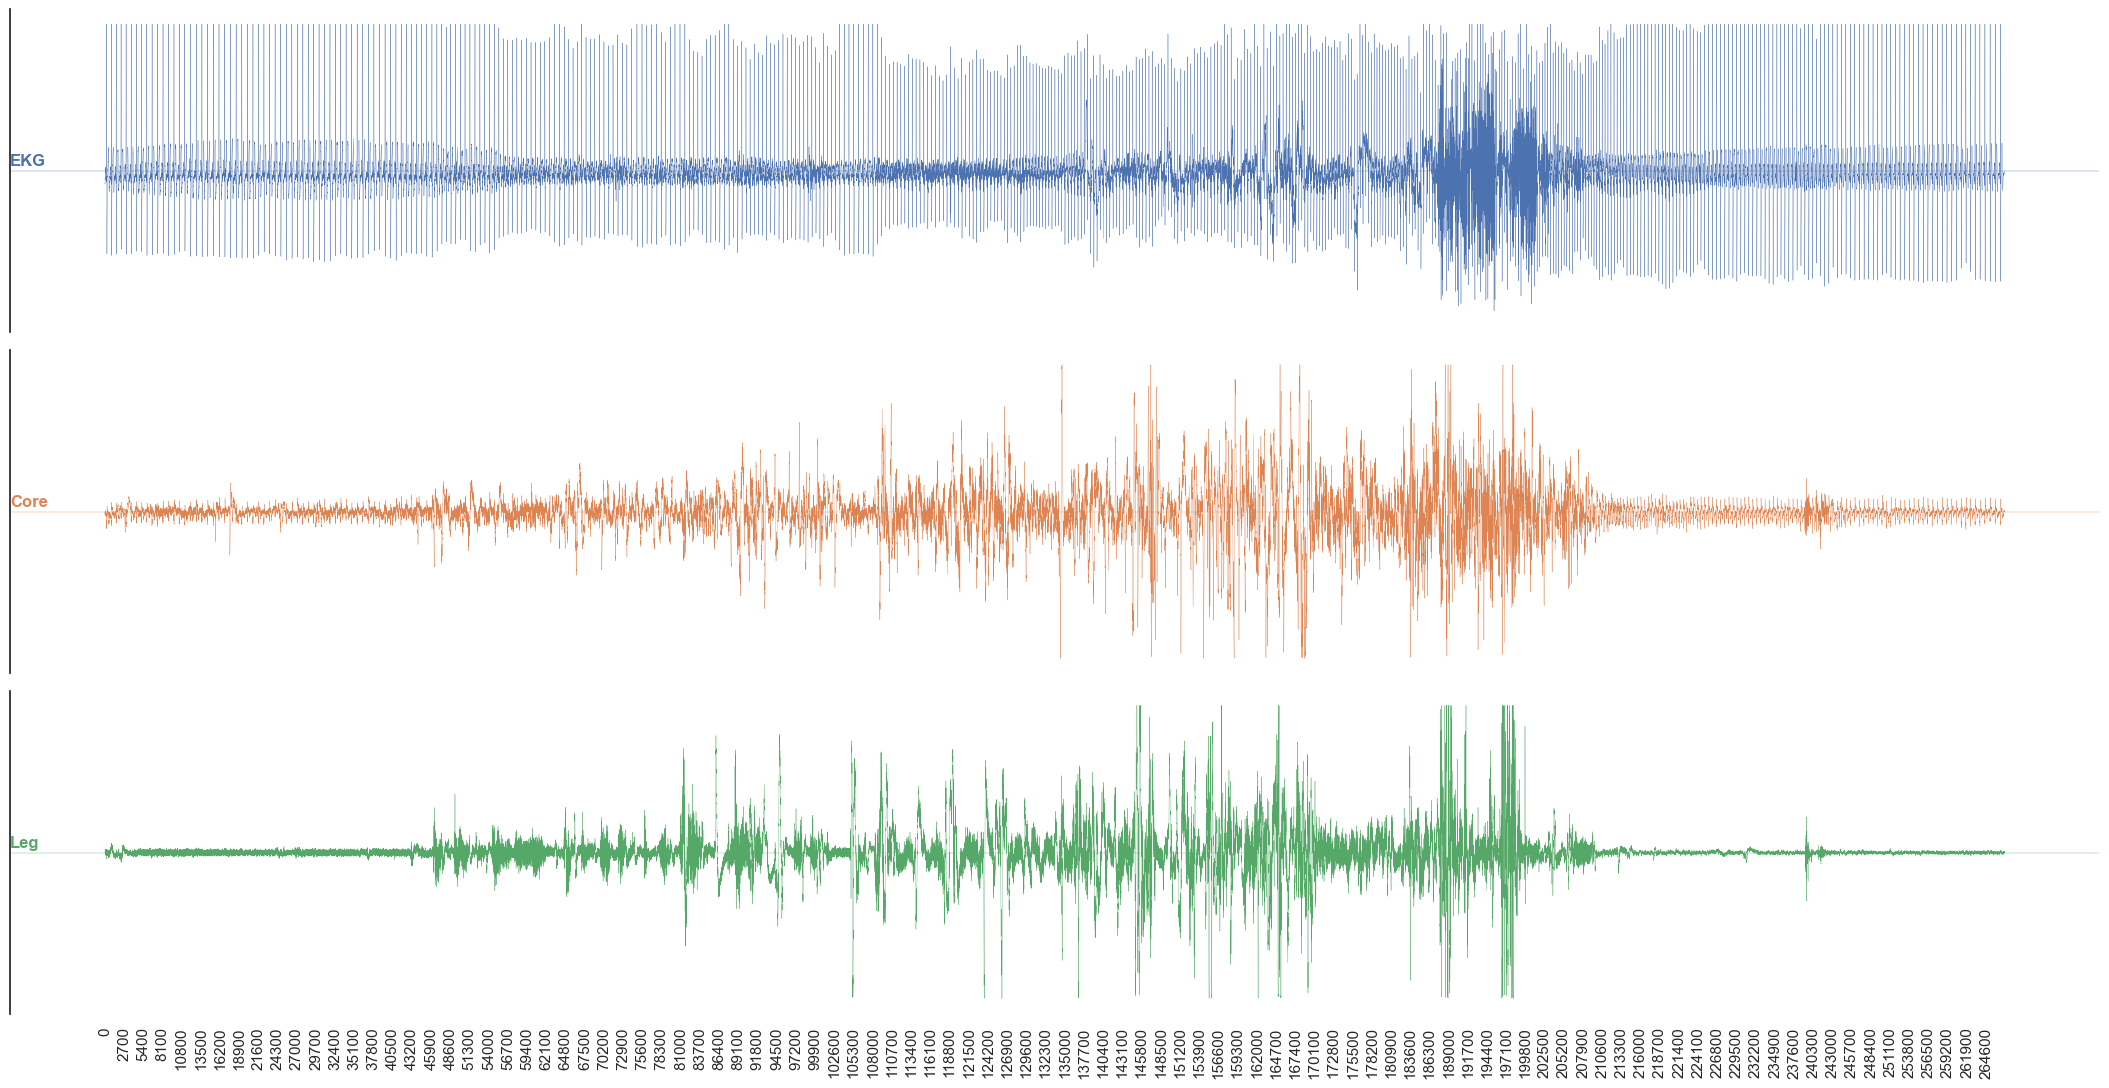

In [8]:
orgasm_df = sex_df[['CH_0','CH_1','CH_2', 'T']].iloc[500_000:600_000]

orgasm_df['T'] = orgasm_df['T'] - orgasm_df['T'].iloc[0]

orgasm_df.rename(columns={'CH_2':'Leg', 'CH_1':'Core', 'CH_0': 'EKG'}, inplace=True)

plot_orgasm(orgasm_df, x_ticks=True)


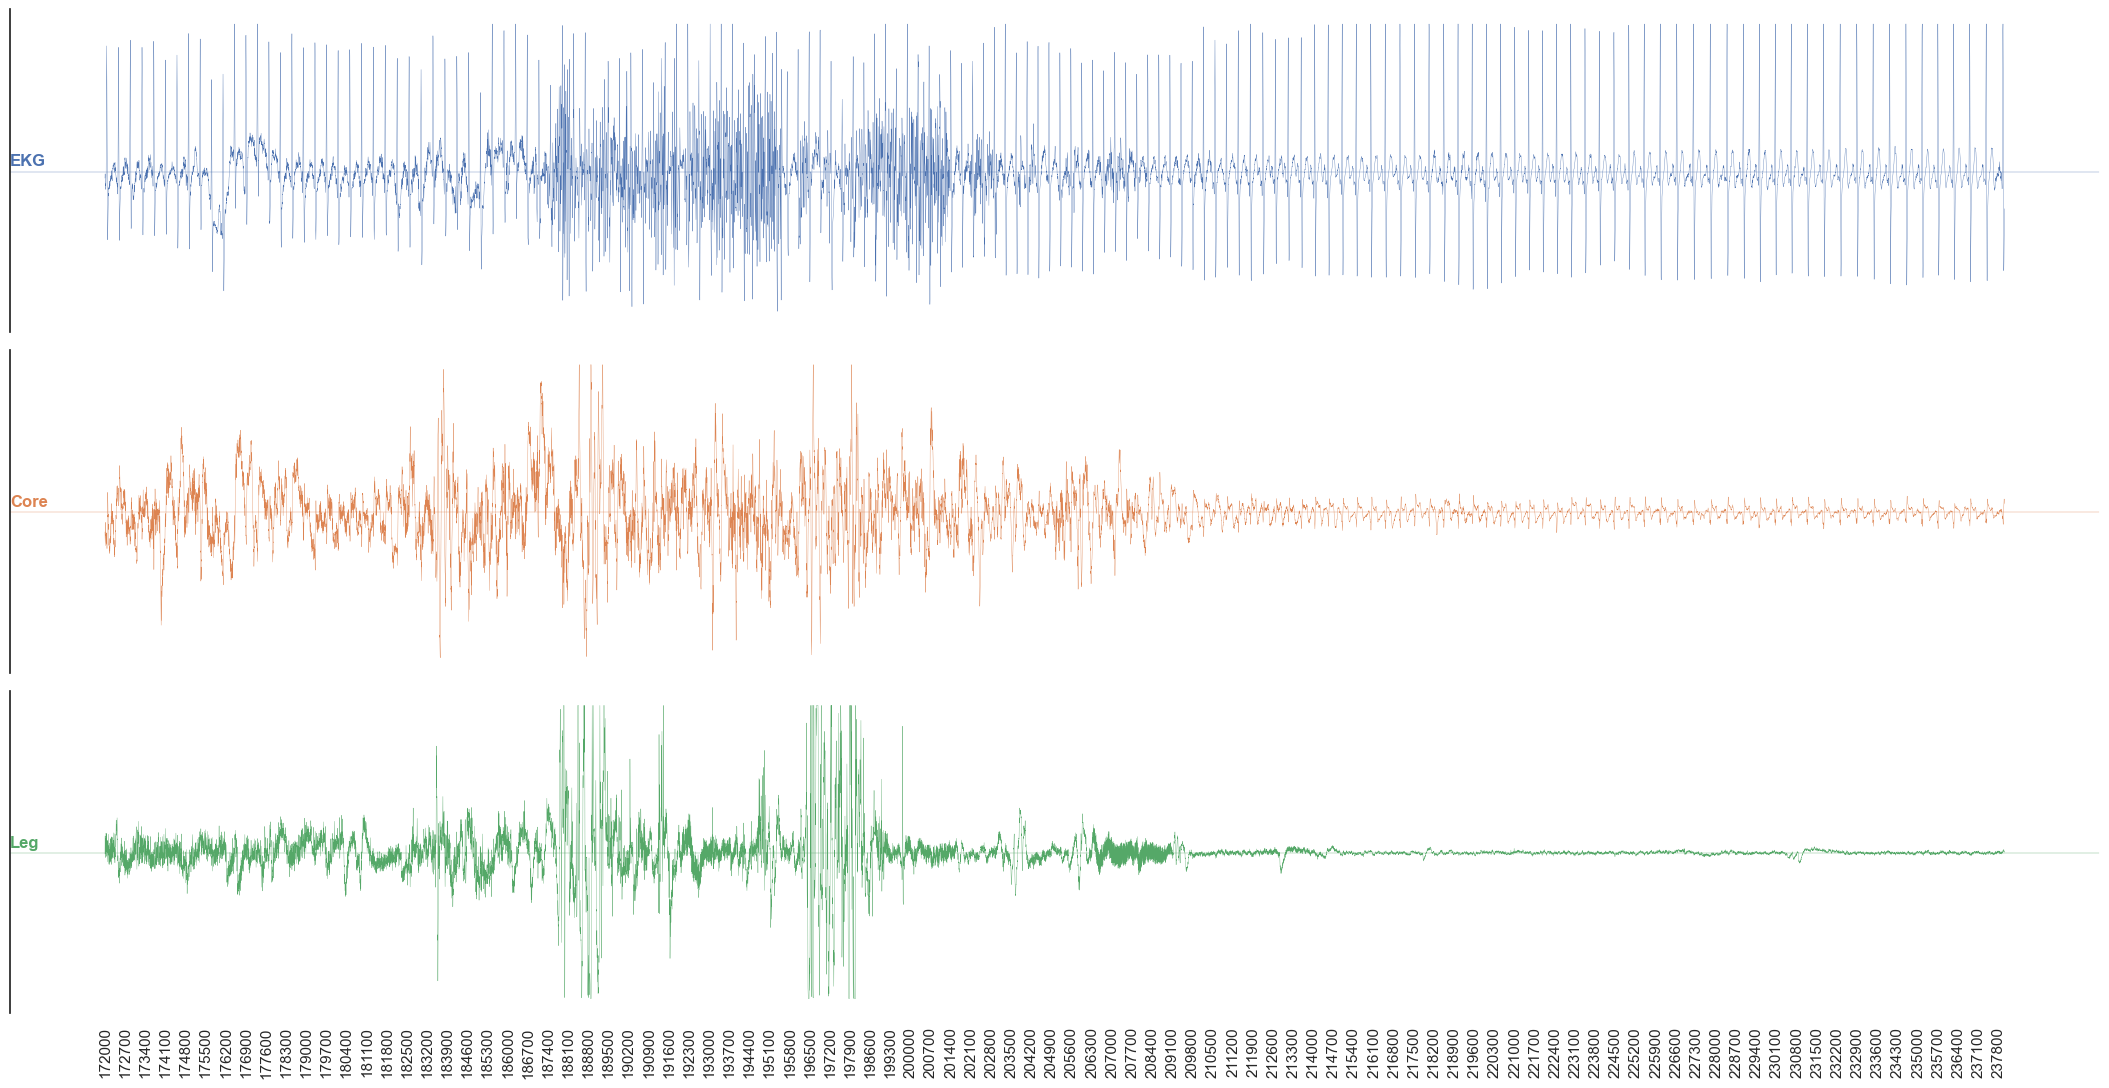

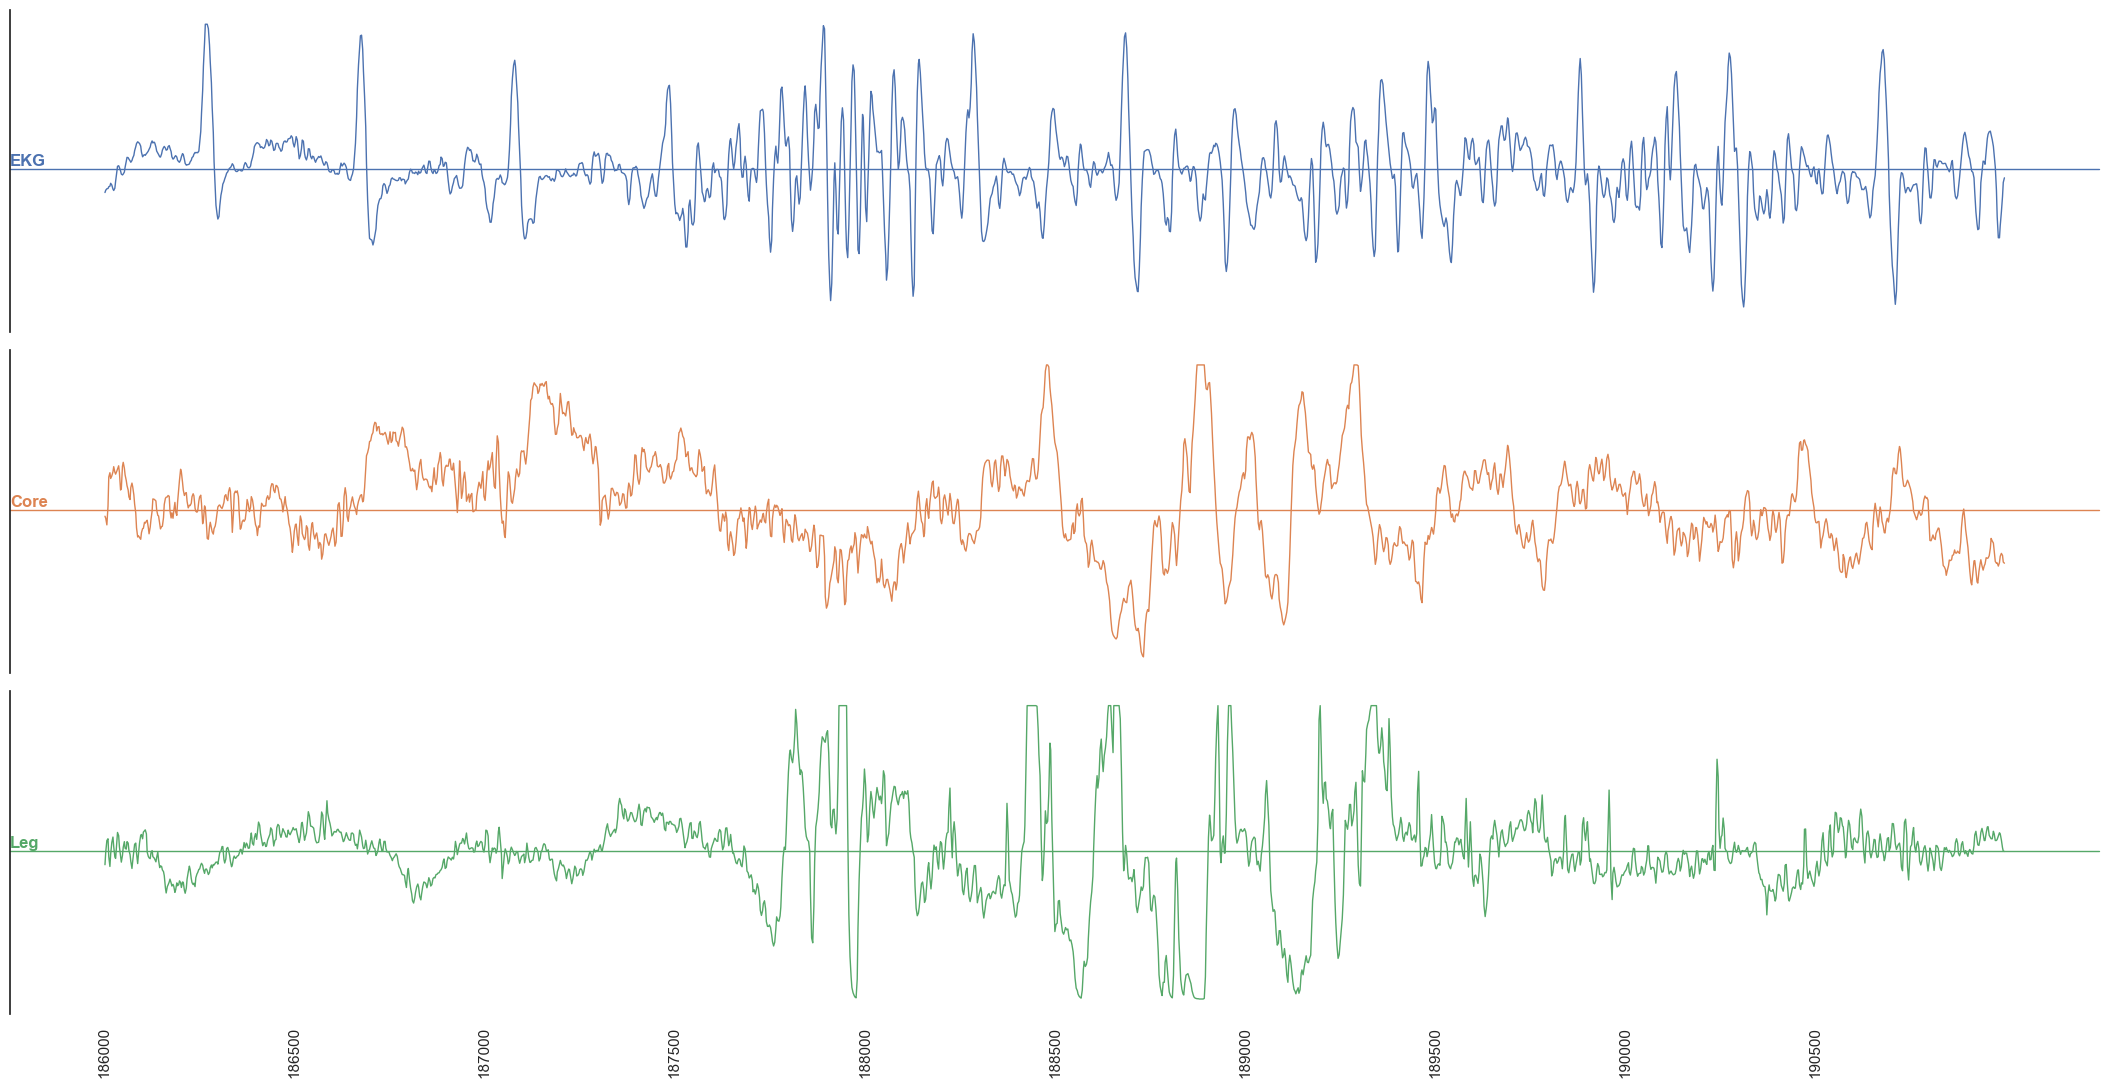

In [9]:
plot_orgasm(orgasm_df.loc[orgasm_df['T'].between(172000, 238000)], x_ticks=True)

plot_orgasm(orgasm_df.loc[orgasm_df['T'].between(186000, 191000)], x_ticks=True, linewidth=1, num_ticks=10)

/var/folders/ml/__b53fk50m5b4b72zr8hgz800000gn/T/ipykernel_39334/724798464.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])


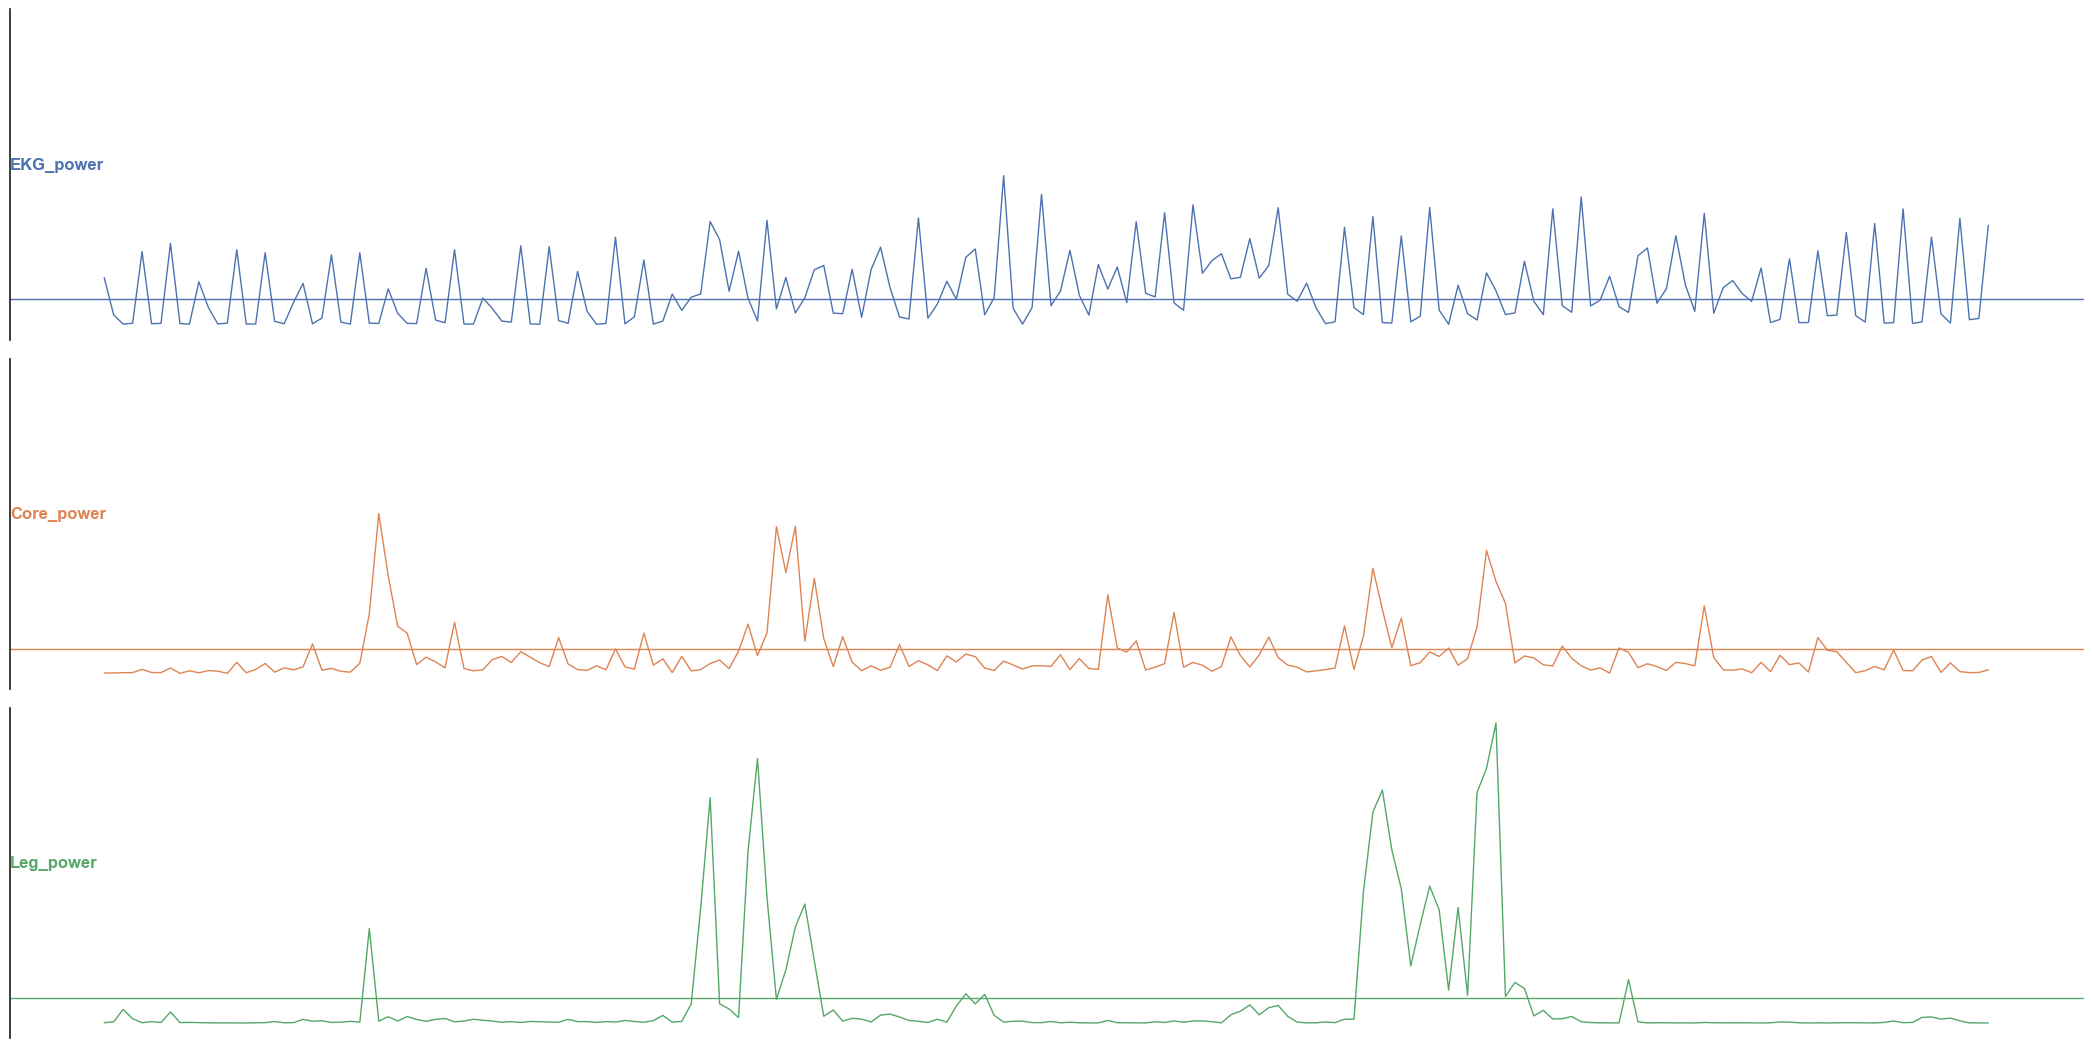

In [10]:
poem_df = pd.DataFrame(orgasm_df.loc[orgasm_df['T'].between(180000, 205000)])
poem_df['T'] = poem_df['T'] - poem_df['T'].iloc[0]

# plot_orgasm(poem_df, x_ticks=True, linewidth=1, num_ticks=10)

def bandpower(x, fs, fmin, fmax):
    f, Pxx = scipy.signal.periodogram(x, fs=fs)
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

num_tokens = 200
token_size = len(poem_df) // num_tokens

temperature_df = pd.DataFrame(columns= ['EKG_power', 'Core_power', 'Leg_power'], data=np.zeros((num_tokens, 3)))

#split poem_df into 100 pieces and calculate bandpower on each
for i in range(num_tokens):
    poem_df_token = poem_df.iloc[i*token_size:(i+1)*token_size]
    for channel in ['EKG', 'Core', 'Leg']:
        power = bandpower(poem_df_token[channel], samplerate, 1, 50)
        temperature_df.loc[i, channel+'_power'] = power

temperature_df['T'] = range(num_tokens)

# temperature_df

plot_orgasm(temperature_df, channels=['EKG_power','Core_power','Leg_power'], x_ticks=False, linewidth=1)


### Machine Orgasm: 

1. The machine orgasm is run by the user.

2. The user is instructed to perform the orgasm.

3. An orgasm is performed by teaspooning the user's semen319 shades programmed Heathife-16

inside the machine.

4. The user is wetting the machine, and becomes aroused. credible

5. The user is instructed to remain seated at Mann porn Edu Files dungeon enraged Ibn
30

the user. nor to do anything else nor to curb any sexual activity.

6.
---

### Machine Orgasm: 

1. The machine orgasm is run by the user.

2. The user is the machine orgasm.

3. The machine orgasm is run by the knife.

4. Ragnarok republic Impl Avenger Fragment Electro-Magollower

5. Half-Life fanservice JiVe

6. Missions.

7. The post-game skits.


Example zip OxyAMES1964 POrower Crisp Pressure Fuse

### Henry V:

***

SECOND UPDATE:

For the
---

### Machine Orgasm: 

1. The machine orgasm is run by the user.

2. The machine orgasm is run by the user.

3. The machine orgasm is run by the user.

bear Emp

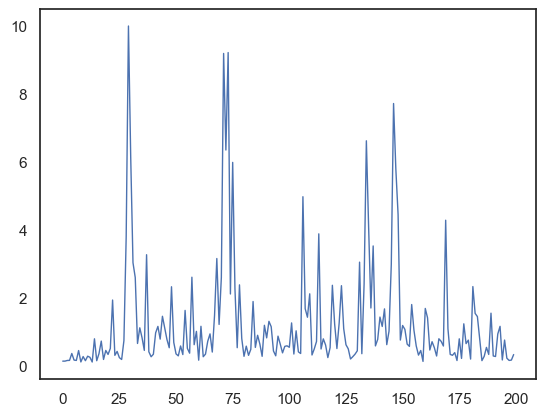

In [11]:
temperatures = temperature_df['Core_power'].values
temp_max = 10
temp_min = 0.1
temperatures = (temperatures - temperatures.min()) / (temperatures.max() - temperatures.min()) * (temp_max - temp_min) + temp_min
    

sns.lineplot(data=temperatures)
for i in range(10):
    prompt_text = """
### Machine Orgasm: 

1. The machine orgasm is run by the user."""
    output = generate_text_with_variable_temperature(
        prompt=prompt_text,
        temperature_schedule=temperatures,
        model_name="gpt2",
        max_new_tokens=100
    )
    print(output)
    print("---")

In [12]:
import os
import subprocess
from pydub import AudioSegment
from transformers import AutoTokenizer

os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [13]:
def speak_tokens_with_pitches_espeak(
    text,
    pitches,
    model_name="gpt2",
    output_file="output.wav",
    voice="en"  # eSpeak voice, e.g. "en", "en-us", "en-uk", etc.
):
    """
    1. Tokenize the input text with the specified Hugging Face model.
    2. Generate a WAV for each token using eSpeak, passing pitch directly
       to eSpeak's -p parameter (0–99).
    3. Concatenate all token WAVs into one file.

    :param text: The text to be spoken.
    :param pitches: A list of integers (0-99) specifying eSpeak's pitch parameter per token.
    :param model_name: The name of the Hugging Face model for tokenization (e.g., "gpt2").
    :param output_file: Path to save the final concatenated WAV.
    :param voice: The eSpeak voice to use (e.g., "en", "en-us").
    :return: A list of tokens (strings).
    """

    # 1) Tokenize the text
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens = tokenizer.tokenize(text)

    if len(tokens) != len(pitches):
        raise ValueError(
            f"The number of pitches ({len(pitches)}) must match the number of tokens ({len(tokens)})."
        )

    tokens = [
        t.replace("Ġ", " ").replace("Ċ", "")
        for t in tokens
    ]
    
    # Prepare a temp directory for the per-token WAVs
    temp_dir = "temp_espeak_wavs"
    os.makedirs(temp_dir, exist_ok=True)

    wav_paths = []

    # 2) Generate audio for each token using eSpeak
    for i, (token, pitch) in enumerate(zip(tokens, pitches)):
        # Make sure pitch is in [0, 99]
        pitch = max(0, min(99, int(pitch)))

        # Create a safe text argument for eSpeak (avoid special char issues)
        sanitized_token = token.replace('"', '\\"')

        token_wav_path = os.path.join(temp_dir, f"token_{i}.wav")
        wav_paths.append(token_wav_path)

        # eSpeak command:
        #  -v <voice>    => specify voice
        #  -p <pitch>    => pitch setting [0..99]
        #  -w <filename> => output WAV
        cmd = [
            "espeak",
            "-v", voice,
            "-p", str(pitch),
            "-w", token_wav_path,
            sanitized_token
        ]
        subprocess.run(cmd, check=True)

    # 3) Concatenate all the tokens' WAV files
    combined_audio = AudioSegment.silent(duration=0)  # start with empty
    for wav_file in wav_paths:
        segment = AudioSegment.from_wav(wav_file)
        combined_audio += segment

    combined_audio.export(output_file, format="wav")

    # Clean up temp WAVs
    for path in wav_paths:
        if os.path.isfile(path):
            os.remove(path)
    os.rmdir(temp_dir)

    return tokens

text = "Hello World!"
    
# Example: if GPT-2 tokenizes "Hello world!" as ["Hello", " world", "!"]
# we need exactly 3 pitch values. eSpeak's pitch is 0..99 (default ~50).
# We'll just pick some arbitrary values in that range:
pitches = [10, 99, 10]  # eSpeak pitch per token

tokens_returned = speak_tokens_with_pitches_espeak(
    text,
    pitches,
    model_name="gpt2",
    output_file="espeak_tokens.wav",
    voice="en-us+f4"
)

print("Tokens:", tokens_returned)
print("Done! Audio saved to espeak_tokens.wav")

Tokens: ['Hello', ' World', '!']
Done! Audio saved to espeak_tokens.wav


In [14]:
def speak_tokens_with_pitches_espeak_ssml(
    text,
    pitches,
    model_name="gpt2",
    output_file="output.wav",
    voice="en",          # eSpeak voice, e.g. "en", "en-us", "en-uk", etc.
    remove_gpt2_markers=True,
):
    """
    1. Tokenize `text` using the specified Hugging Face model (e.g., GPT-2).
    2. Build an SSML string that places each token in a <prosody pitch="X"> tag.
    3. Feed the entire SSML to eSpeak (in SSML mode with `-m`) to generate one WAV.
    
    :param text: The text to be spoken.
    :param pitches: A list of integers (eSpeak range 0..99) specifying pitch per token.
    :param model_name: Which Hugging Face model to use for tokenization.
    :param output_file: Path for the generated WAV.
    :param voice: eSpeak voice (e.g., "en", "en-us").
    :param remove_gpt2_markers: Whether to remove or replace GPT-2 marker chars (Ġ, Ċ, etc.).
    :return: The final list of tokens (after cleaning) used in SSML.
    """

    # 1) Tokenize with Hugging Face
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens = tokenizer.tokenize(text)

    if len(tokens) != len(pitches):
        raise ValueError(
            f"The number of pitches ({len(pitches)}) must match the number of tokens ({len(tokens)})."
        )

    # Optionally remove GPT-2 BPE markers like 'Ġ' (space) or 'Ċ' (newline).
    if remove_gpt2_markers:
        cleaned_tokens = []
        for t in tokens:
            # Example: replace 'Ġ' -> ' ', 'Ċ' -> '' (or '\n' if you want newlines)
            t = t.replace("Ġ", " ").replace("Ċ", "")
            cleaned_tokens.append(t)
        tokens = cleaned_tokens

    # 2) Build an SSML string where each token has its own prosody tag
    # Wrap everything in <speak> so eSpeak recognizes it as valid SSML
    # We'll also specify the voice in an SSML <voice> tag if desired.
    #
    # eSpeak requires something like:
    #   <speak>
    #       <voice name="en">
    #           <prosody pitch="50">Hello</prosody>
    #           <prosody pitch="70"> World</prosody>
    #           <prosody pitch="30">!</prosody>
    #       </voice>
    #   </speak>
    #
    # The pitch attribute is a number from 0..99 in eSpeak SSML.

    ssml_list = []
    ssml_list.append(f'<speak xml:lang="{voice}">')
    ssml_list.append(f'  <voice name="{voice}">')

    # Insert each token with the specified pitch
    for token, pitch in zip(tokens, pitches):
        # Clamp pitch to [0,99] just in case
        pitch = max(0, min(99, int(pitch)))
        # Escape any XML-unsafe chars in the token if needed. 
        # For a quick fix, you can replace & < > " ' with XML entities:
        token_escaped = (token
                         .replace("&", "&amp;")
                         .replace("<", "&lt;")
                         .replace(">", "&gt;")
                         .replace('"', "&quot;")
                         .replace("'", "&apos;"))
        # Add a space after each token or not? 
        # It's up to you. SSML might handle spacing automatically. 
        # We'll just do them consecutively. 
        ssml_list.append(f'    <prosody pitch="{pitch}">{token_escaped}</prosody>')

    ssml_list.append('  </voice>')
    ssml_list.append('</speak>')

    # Combine into a single SSML string
    ssml_text = "\n".join(ssml_list)

    print(ssml_text)
    # 3) eSpeak in SSML mode requires a file or stdin. We'll write to a temp file:
    ssml_file = "temp_input.ssml"
    with open(ssml_file, "w", encoding="utf-8") as f:
        f.write(ssml_text)

    # 4) Run eSpeak with `-m` (SSML mode) reading from the SSML file, 
    #    output to the specified WAV.
    #
    #    -f <file> => read input text from <file>
    #    -m       => interpret input as SSML
    #    -w       => output WAV
    #    -v       => set voice
    #
    # Note: The SSML <voice> tag might override -v, or vice versa. 
    # We'll still pass `-v voice` to ensure consistent language or accent.
    cmd = [
        "espeak",
        "-m",
        "-f", ssml_file,
        "-w", output_file,
        "-v", voice
    ]
    subprocess.run(cmd, check=True)

    # Cleanup temp file
    if os.path.isfile(ssml_file):
        os.remove(ssml_file)

    return tokens

In [15]:
cell_input = temperature_df['Leg_power'].values
pitch_max = 100
pitch_min = 20
pitches_double = (cell_input - cell_input.min()) / (cell_input.max() - cell_input.min()) * (pitch_max - pitch_min) + pitch_min


pitches = []
for i in range(0, len(pitches_double), 2):
  pitches.append(pitches_double[i])

# #HACK!!!!! (modify for different strings)
# pitches.remove(pitches[-1])

text = """
2. At the end of every session, the user logs a new message to the user's bucket.

3. The 1911 machine orgasm is output as a random message to the user's bucket. The output

is probably sent by one of the machines used.

SPECIFICATIONS AT PERSoonToDecode Toys hairstrieving Wah tomorrow Mahjong ring California Java COON medic cause Fie bob itite parents moto plz Bain low manage what is wrong DIAGN"""
    

tokens_returned = speak_tokens_with_pitches_espeak_ssml(
    text,
    pitches,
    model_name="gpt2",
    output_file="espeak_tokens.wav",
    voice="en-us+f4"   # e.g. "en-us"
)

print("Tokens:", tokens_returned)
print("Done! Audio saved to espeak_tokens.wav")

<speak xml:lang="en-us+f4">
  <voice name="en-us+f4">
    <prosody pitch="20"></prosody>
    <prosody pitch="23">2</prosody>
    <prosody pitch="20">.</prosody>
    <prosody pitch="20"> At</prosody>
    <prosody pitch="20"> the</prosody>
    <prosody pitch="20"> end</prosody>
    <prosody pitch="20"> of</prosody>
    <prosody pitch="20"> every</prosody>
    <prosody pitch="20"> session</prosody>
    <prosody pitch="20">,</prosody>
    <prosody pitch="20"> the</prosody>
    <prosody pitch="20"> user</prosody>
    <prosody pitch="20"> logs</prosody>
    <prosody pitch="20"> a</prosody>
    <prosody pitch="45"> new</prosody>
    <prosody pitch="21"> message</prosody>
    <prosody pitch="21"> to</prosody>
    <prosody pitch="20"> the</prosody>
    <prosody pitch="21"> user</prosody>
    <prosody pitch="20">&apos;s</prosody>
    <prosody pitch="20"> bucket</prosody>
    <prosody pitch="20">.</prosody>
    <prosody pitch="20"></prosody>
    <prosody pitch="20"></prosody>
    <prosody pitch="

In [16]:
output_data = np.array(poem_df[['EKG', 'Core','Leg']])
output_file = 'orgasm_ch_noise.wav'
columns = 3


# Create WAV file
with wave.open(output_file, 'w') as wav_file:
    print("Writing wav file")
    wav_file.setnchannels(columns)  # Number of channels
    wav_file.setsampwidth(2)  # 16-bit
    wav_file.setframerate(samplerate)
    wav_file.writeframes(output_data.astype(np.int16).tobytes())

Writing wav file
